In [12]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import time
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

## data energy consumption

In [13]:
data_energy = pd.read_csv("../data/energy_consump.csv")

In [14]:
data_energy.head()

,Hub,ZSP,Date,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,...,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
0,Center,FZSZOE27,2010-01-01,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Center,FZSZOE27,2010-01-02,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Center,FZSZOE27,2010-01-03,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Center,FZSZOE27,2010-01-04,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Center,FZSZOE27,2010-01-05,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data_energy.Date = data_energy.Date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

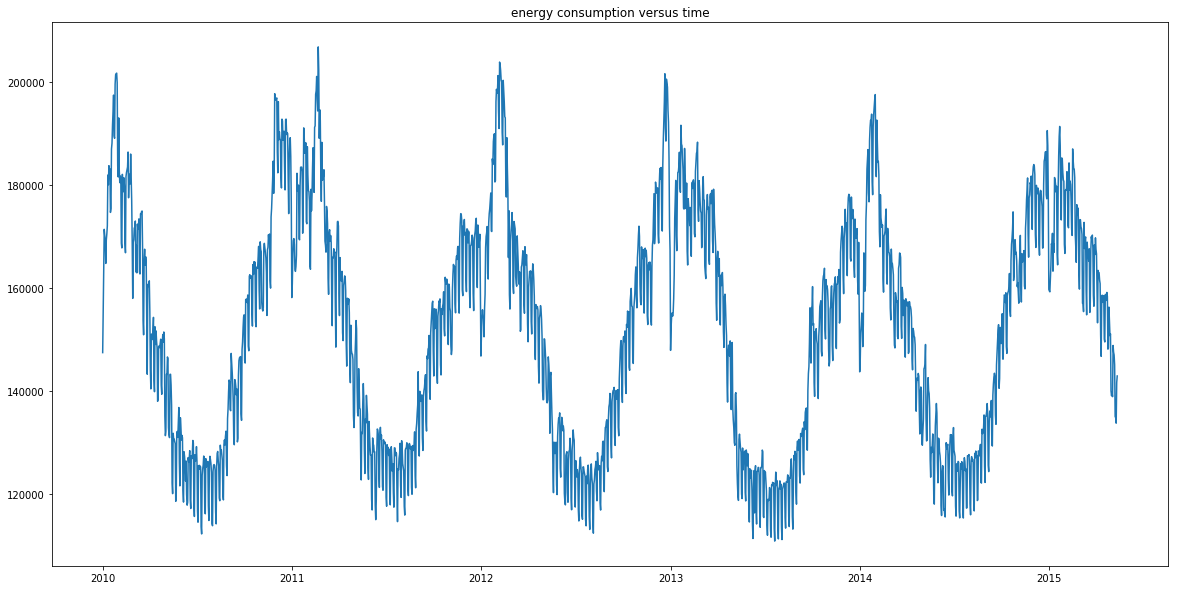

In [16]:
plt.title("energy consumption versus time")
plt.plot(data_energy.Date, data_energy.EnergyConsump);

In [17]:
data = data_energy.EnergyConsump

In [18]:
class TSAA:
    def __init__(self, period, alpha, beta, gamma):
        self.period = period
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        
    def smooth(self, data):
        l = np.zeros(len(data)+1)
        b = np.zeros(len(data)+1)
        s = np.zeros(len(data)+1)
        smoothed_data = []
        for i, datum  in enumerate(data):
            smoothed_data.append(l[i] + b[i] + s[np.max([0, i-self.period])])
            l[i+1] = (1-self.alpha)*l[i]+self.alpha*(data[i]-s[i-self.period])
            b[i+1] = (1-self.beta)*b[i]+self.beta*(l[i+1]-l[i])
            s[i+1] = (1-self.gamma)*s[np.max([0, i+1-self.period])]+self.gamma*(data[i]-l[i+1])
        n = data - smoothed_data
        
            
        return smoothed_data, s, l, n
                                 
            
        

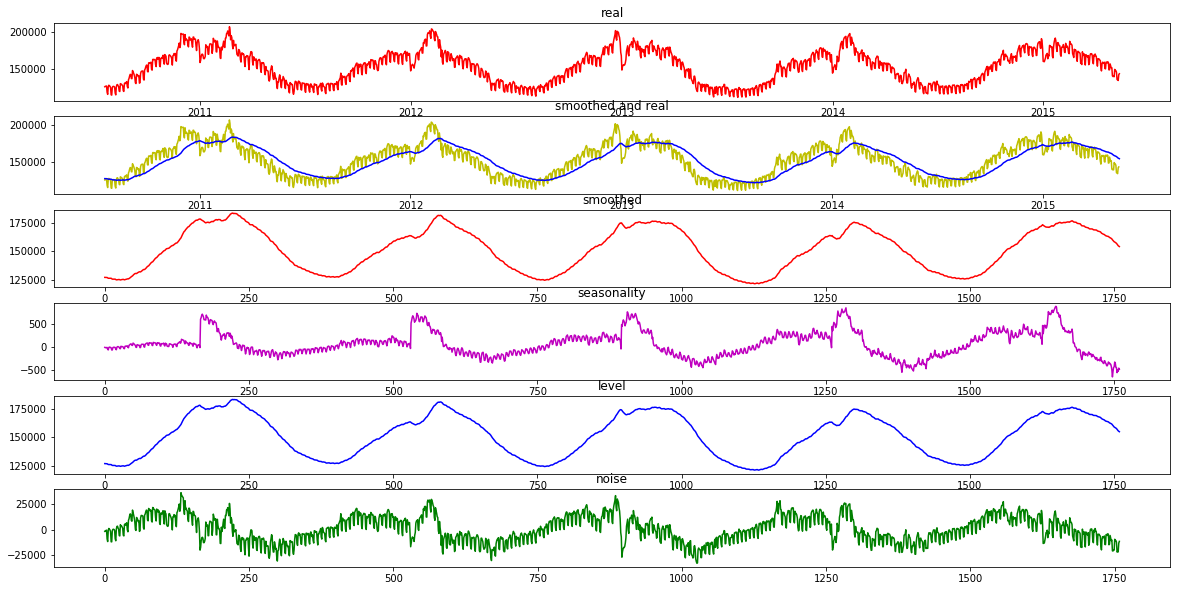

In [19]:
tsaa = TSAA(365, 0.03, 0.1, 0.005)
smoothed_data_tsa, seasonality, level, noise= tsaa.smooth(data)

warm_up = 200

plt.subplot(6,1,1)
plt.plot(data_energy.Date[warm_up:], data[warm_up:],"r")
plt.title("real")

plt.subplot(6,1,2)
plt.plot(data_energy.Date[warm_up:], data[warm_up:],"y")
plt.plot(data_energy.Date[warm_up:], smoothed_data_tsa[warm_up:], "b")
plt.title('smoothed and real')

plt.subplot(6,1,3)
plt.plot(range(len(smoothed_data_tsa[warm_up:])), smoothed_data_tsa[warm_up:],"r")
plt.title("smoothed")

plt.subplot(6,1,4)
plt.plot(range(len(seasonality[warm_up:])), seasonality[warm_up:], "m")
plt.title('seasonality')

plt.subplot(6,1,5)
plt.plot(range(len(level[warm_up:])), level[warm_up:], "b")
plt.title('level')

plt.subplot(6,1,6)
plt.plot(range(len(noise[warm_up:])), noise[warm_up:], "g")
plt.title('noise')

plt.show()

In [20]:
class TSMA:
    def __init__(self, period, alpha, gamma):
        self.period = period
        self.alpha = alpha
        self.gamma = gamma
        
    def smooth(self, data):
        l = np.ones(len(data)+1)
        s = np.ones(len(data)+1)
        smoothed_data = []
        for i, datum  in enumerate(data):
            smoothed_data.append(l[i]*s[np.max([0, i-self.period])])
            l[i+1] = (1-self.alpha)*l[i]+self.alpha*(data[i]/s[i-self.period])
            s[i+1] = (1-self.gamma)*s[np.max([0, i+1-self.period])]+self.gamma*(data[i]/l[i+1])
        n = data - smoothed_data
        
            
        return smoothed_data, s, l, n
         
        

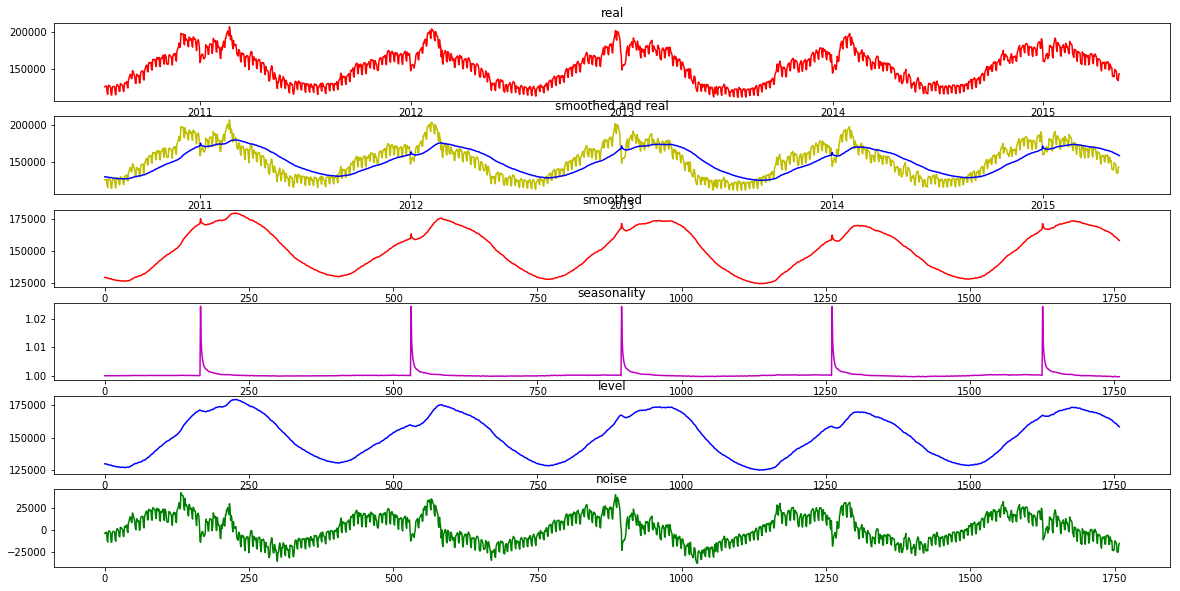

In [21]:
tsma = TSMA(365, 0.02, 0.0005)
smoothed_data_tsa, seasonality, level, noise= tsma.smooth(data)

warm_up = 200

plt.subplot(6,1,1)
plt.plot(data_energy.Date[warm_up:], data[warm_up:],"r")
plt.title("real")

plt.subplot(6,1,2)
plt.plot(data_energy.Date[warm_up:], data[warm_up:],"y")
plt.plot(data_energy.Date[warm_up:], smoothed_data_tsa[warm_up:], "b")
plt.title('smoothed and real')

plt.subplot(6,1,3)
plt.plot(range(len(smoothed_data_tsa[warm_up:])), smoothed_data_tsa[warm_up:],"r")
plt.title("smoothed")

plt.subplot(6,1,4)
plt.plot(range(len(seasonality[warm_up:])), seasonality[warm_up:], "m")
plt.title('seasonality')

plt.subplot(6,1,5)
plt.plot(range(len(level[warm_up:])), level[warm_up:], "b")
plt.title('level')

plt.subplot(6,1,6)
plt.plot(range(len(noise[warm_up:])), noise[warm_up:], "g")
plt.title('noise')

plt.show()